This notebook is used to run the whole process for a single ticker. (Includes 10 training and test)

In [1]:
from Data import *
from Model_Analysis import *
from CNN_Model import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter(action='ignore', category=Warning)

import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.utils import model_to_dot, plot_model

In [2]:
params = {'batch_size': 80,
          'conv2d_layers1': {'dropout': 0.2, 'filters': 35,
                                              'kernel_size': 2, 'maxpool': 0, 'strides': 1,
                                              'kernel_regularizer': 0.0, 'padding': 'valid', 'kernel_initializer': 'random_normal'},
          'conv2d_layers2': {'dropout': 0.05, 'filters': 20,
                             'kernel_size': 2, 'maxpool': 2, 'strides': 2,
                             'kernel_regularizer': 0.0, 'padding': 'valid',  'kernel_initializer': 'random_normal'},
          'dense_layers': {'dense_do_1': 0.2, 'dense_nodes_1': 100, 'kernel_regularizer_1': 0.0, 'layers': 'one'},
          'epochs': 3000, 'lr': 0.001, 'optimizer': 'adam',
          'input_dim_1': 15, 'input_dim_2': 15, 'input_dim_3': 3}

In [7]:
pred_total = np.array([])
y_test_total = np.array([])
ticker_name = 'EWZ'
Start_time = '2005-01-01'
End_time = '2020-01-01'
Tech_intervals = range(6,27)
group_st_years = range(2005,2015)

## Initiate the Data Generator Object & Calculate the technical indicators on whole dataset
Data_gen = Data(ticker_name)
df = Data_gen.Load_Data(Start_time, End_time)
df_Tech = Data_gen.cal_tech(df, 'close', Tech_intervals, whole_df=True)
groups = Data_gen.get_groups(group_st_years, df_Tech)

## train CNN model for every group (5-year training data & 1-year test data)
for y in group_st_years:
    np_path = Data_gen.ticker_path + os.sep + Data_gen.ticker + '_' + str(y) + os.sep + 'x_train.npy'
    if os.path.exists(np_path):
        x_train, x_cv, x_test, y_train, y_cv, y_test, train_class_weights = Data_gen.load_np_data(y)
    else:
        data=groups[y]
        x_train, x_cv, x_test, y_train, y_cv, y_test, train_class_weights = Data_gen.Process_Data(data, top_k=325, dim=15)
    print('********************** Year {} Data Processed done ***************************'.format(str(y)))
    
    model, es, rlp, mcp  = CNN_construct(params, ticker=ticker_name)
    history = model.fit(x_train, y_train, epochs=params['epochs'], verbose=0,
                        batch_size=params['batch_size'], shuffle=True,
                        validation_data=(x_cv, y_cv),
                        callbacks=[es, mcp, rlp],
                        sample_weight=train_class_weights)
    print('********************** Year {} Training done ***************************'.format(str(y)))

    pred_classes, y_test_classes =  test_analysis(model, x_test, y_test)
    pred_total = np.hstack([pred_total, pred_classes])
    y_test_total = np.hstack([y_test_total, y_test_classes])

********************** Year 2005 Data Processed done ***************************
  ...
    to  
  ['...']
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1034\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1034\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1034\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1034\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1034\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1034\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1034\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1034\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1034\assets

Epoch 00034: ReduceLROnPlateau reducing learning rate to 0.0001.
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1034\asset

  ...
    to  
  ['...']
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1042\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model

INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets

Epoch 00032: ReduceLROnPlateau reducing learning rate to 0.0001.
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets
INFO:tensorflow:Assets written to: .\Data\EWZ\best_model\model20200422_1049\assets
INFO:tensorflow:Asset

Confusion Matrix:
[[ 109    0   42]
 [   0   93   52]
 [ 158  111 1951]]


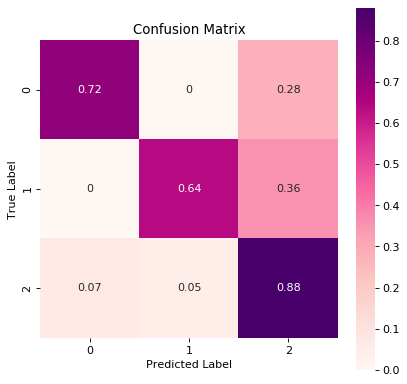

precision of class 0 = 0.72
precision of class 1 = 0.64
precision of class 2 = 0.88
precision avg 0.75 


F1 score (weighted) 0.87
F1 score (macro) 0.66
F1 score (micro) 0.86
cohen's Kappa 0.4691486399850272 



In [8]:
conf_mat = Confusion_Mat( y_test_total, pred_total)
cal_f1_scores(y_test_total, pred_total)

In [9]:
test_index = df.index[(df.index>'2010-01-01') & (df.index<'2020-01-01')]
test_signal = pd.DataFrame(pred_total, index=test_index, columns=['signal'])
test_signal.to_csv('.\\Data\\' + ticker_name + '\\TestSignal_2010_2019.csv')